In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')

## `Problem 1 to 5`:

Dataset link: https://tinyurl.com/2fe6vz4u

**Add a label to every axis and add a proper title for the charts. Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **`Problem-1:`** Draw a line plot of which, the x-axis is the "Year" and the y-axis is sum of "PM2.5" of two countries India and China.

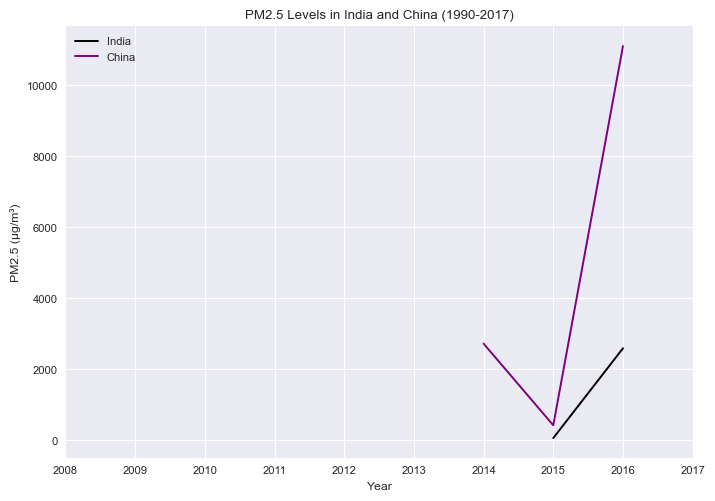

In [32]:
df = pd.read_csv("pollution.csv")
india_series = df[df['Country'] == 'India'].groupby('Year')['PM2.5'].sum()
china_series = df[df['Country'] == 'China'].groupby('Year')['PM2.5'].sum()
plt.plot(india_series.index, india_series.values, label='India', color="black")
plt.plot(china_series.index, china_series.values, label='China', color="purple")
plt.xlabel('Year')
plt.ylabel('PM2.5 (µg/m³)')
plt.title('PM2.5 Levels in India and China (1990-2017)')
plt.xticks(df['Year'].value_counts().index)
plt.legend()
plt.grid(True)

### **`Problem-2:`** Draw a histogram of the  column "PM10" of which the y-axis represents the probability (see the documentation how to draw the probability).

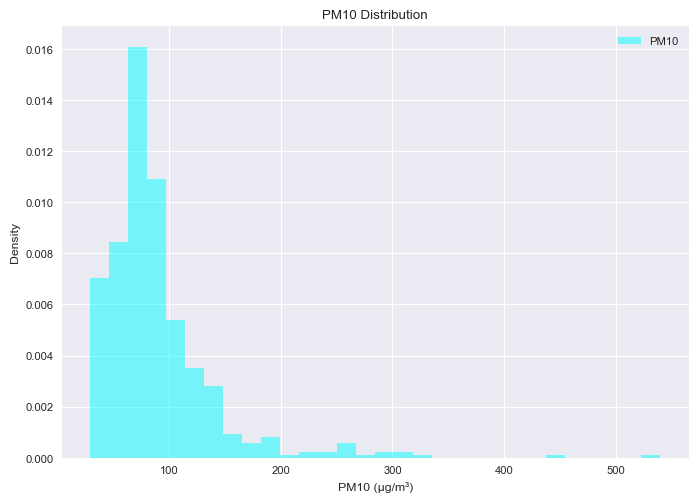

In [37]:
df = pd.read_csv("pollution.csv")
plt.hist(df['PM10'],density=True, bins=30, alpha=0.5, label='PM10', color='cyan')
plt.title('PM10 Distribution')
plt.xlabel('PM10 (µg/m³)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

### **`Problem-3:`** Draw a scatter plot where x-axis represents "PM2.5" and y-axis represents "PM10" for two countries Poland and Chile.

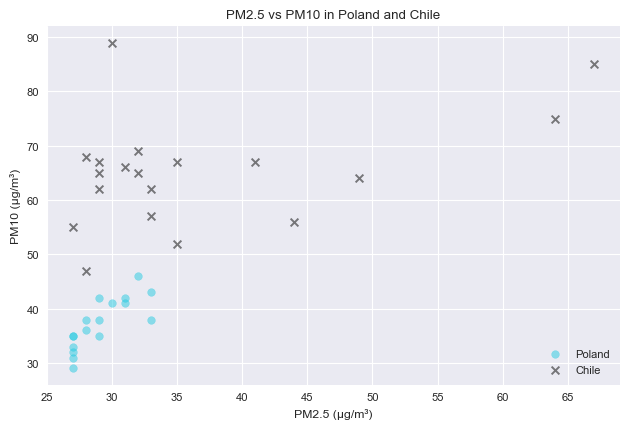

In [39]:
poland = df[df['Country'] == 'Poland']
chile = df[df['Country'] == 'Chile']
plt.scatter(poland['PM2.5'], poland['PM10'], label='Poland', color='#25cbe2', alpha=0.5,marker='o')
plt.scatter(chile['PM2.5'], chile['PM10'], label='Chile', color='#010100', alpha=0.5,marker='x')
plt.xlabel('PM2.5 (µg/m³)')
plt.ylabel('PM10 (µg/m³)')
plt.title('PM2.5 vs PM10 in Poland and Chile')
plt.legend()
plt.grid(True)
plt.tight_layout()

### **`Problem-4:`** Draw a pie chart of top 5 most frequent countries.

Text(0.5, 1.0, 'Top 5 Countries by Number of Pollution Records')

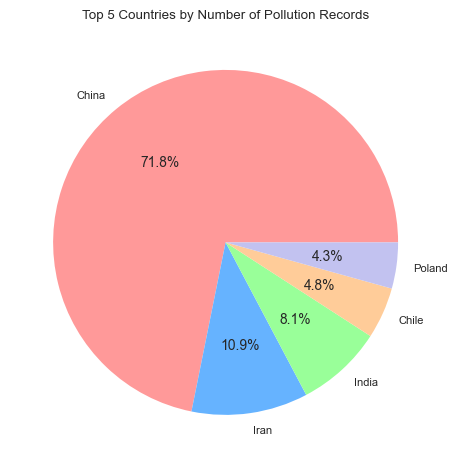

In [44]:
top5series = df['Country'].value_counts().head(5)
plt.pie(top5series, labels=top5series.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Top 5 Countries by Number of Pollution Records')

### **`Problem-5:`** Draw a bar chart which represents the counts of top 5 most frequent countries.

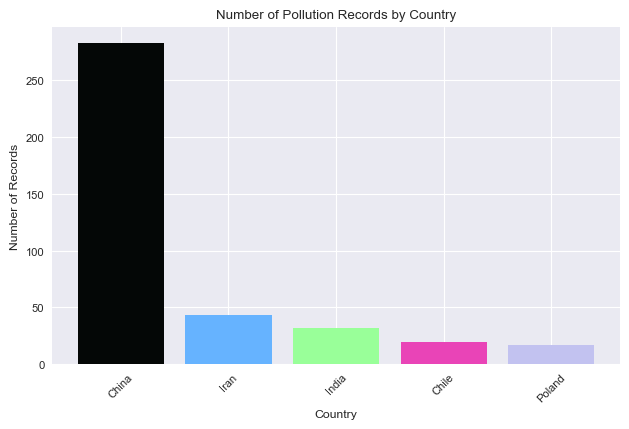

In [46]:
plt.bar(top5series.index, top5series.values, color=["#040706",'#66b3ff','#99ff99',"#e944b7",'#c2c2f0'])
plt.xlabel('Country')
plt.ylabel('Number of Records')
plt.title('Number of Pollution Records by Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)

## `Problem 6-10`
Data Set - https://docs.google.com/spreadsheets/d/e/2PACX-1vTJh6X4_mqixWsfK9mgkllGQkKYW9Wj9kOIMGY2uYsWeS8n5np87DO-SDGQWJ1HXEnxiOVFVzYFYEcR/pub?gid=558678488&single=true&output=csv

This is a Sales data of any company in a Year.


### `Problem-6`
Show a line plot of Total Profit for each month with below styling.
* Dotted Line
* Line Color Blue
* Show Legend at top left
* Circle Marker

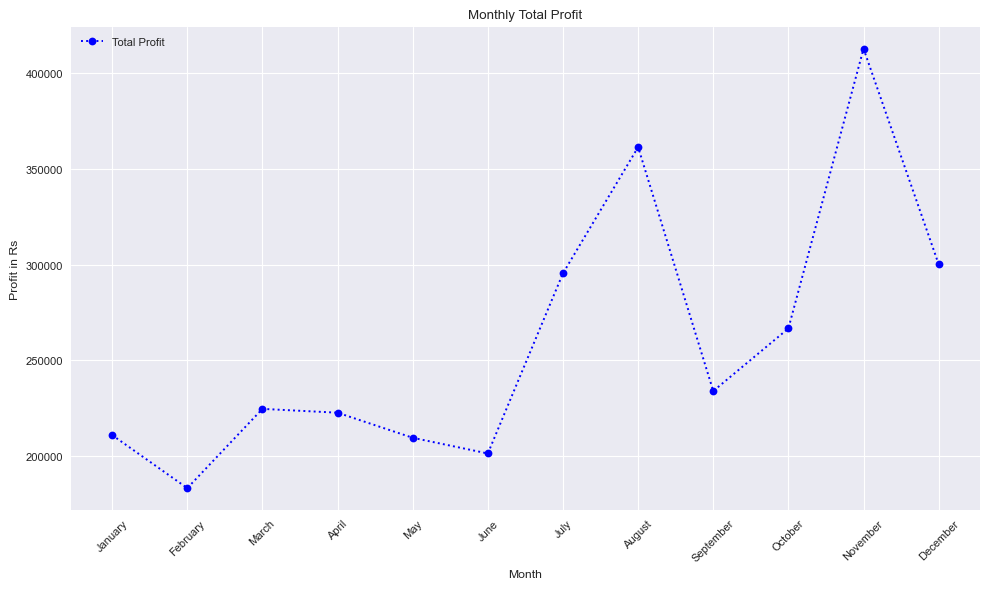

In [57]:
import calendar
df = pd.read_csv("company_sales_data.csv")
# Convert month number to month name
df['month_name'] = df['month_number'].apply(lambda x: calendar.month_name[x])
df.drop(columns=['month_number'], inplace=True)
df.set_index(df['month_name'], inplace=True)
# Plot
plt.figure(figsize=(10,6))
plt.plot(df['month_name'], df['total_profit'], color='blue', linestyle='dotted', marker='o', label='Total Profit')

# Add title and labels
plt.title("Monthly Total Profit")
plt.xlabel("Month")
plt.ylabel("Profit in Rs")
plt.xticks(rotation=45)

# Show legend at top-left
plt.legend(loc='upper left')

# Add grid
plt.grid(True)
plt.tight_layout()
plt.show()

### `Problem-7`
Show sales of each product in march month as pie chart.
* Show Percentage value
* Give Title "Sales in March"
* Explode ToothPaste with shadow

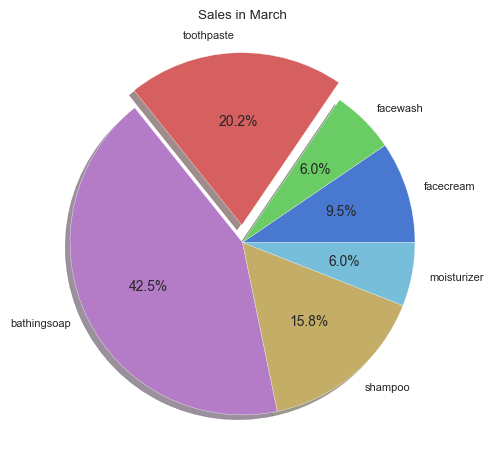

In [61]:
import seaborn as sns
# Fetch March data using iloc
march_sales = df.loc['March'][['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']]

# Create pie chart
sns.set_style("whitegrid")
plt.pie(march_sales, labels=march_sales.index, autopct='%1.1f%%', explode=[0, 0, 0.1, 0, 0, 0], shadow=True)
plt.title("Sales in March")
plt.show()


### `Problem-8` Multiline Plot of all products sales.
* Give different styes for each products
* Add legend at top right

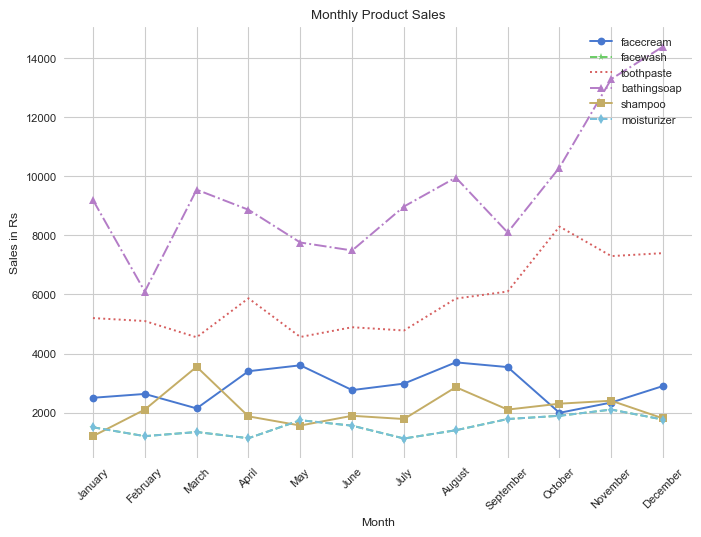

In [65]:

plt.plot(df.index, df['facecream'], label='facecream', linestyle='-', marker='o')
plt.plot(df.index, df['facewash'], label='facewash', linestyle='--', marker='*')
plt.plot(df.index, df['toothpaste'], label='toothpaste', linestyle=':', marker='+')
plt.plot(df.index, df['bathingsoap'], label='bathingsoap', linestyle='-.', marker='^')
plt.plot(df.index, df['shampoo'], label='shampoo', linestyle='-', marker='s')
plt.plot(df.index, df['moisturizer'], label='moisturizer', linestyle='--', marker='d')
plt.title("Monthly Product Sales")
plt.xlabel("Month")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.ylabel("Sales in Rs")
plt.grid(True)

plt.show()

### `Problem-9` Show Quarter wise Sales data for all products as multi Bar chart.


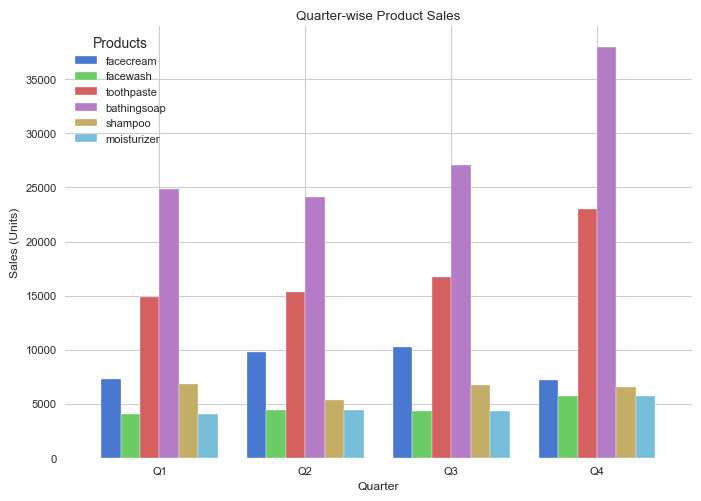

In [69]:
# Define quarters
quarters = {'January': 'Q1', 'February': 'Q1', 'March': 'Q1', 'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
            'July': 'Q3', 'August': 'Q3', 'September': 'Q3', 'October': 'Q4', 'November': 'Q4', 'December': 'Q4'}

# Add quarter column
df['Quarter'] = df.index.map(quarters)

# Aggregate sales by quarter
products = ['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']
quarter_sales = df.groupby('Quarter')[products].sum()

# Create multi-bar chart
quarter_sales.plot(kind='bar', width=0.8)
plt.title("Quarter-wise Product Sales")
plt.xlabel("Quarter")
plt.ylabel("Sales (Units)")
plt.xticks(rotation=0)
plt.legend(title='Products')
plt.show()

### `Problem-10` Plot Stacked Bar chart quarter wise for each product.

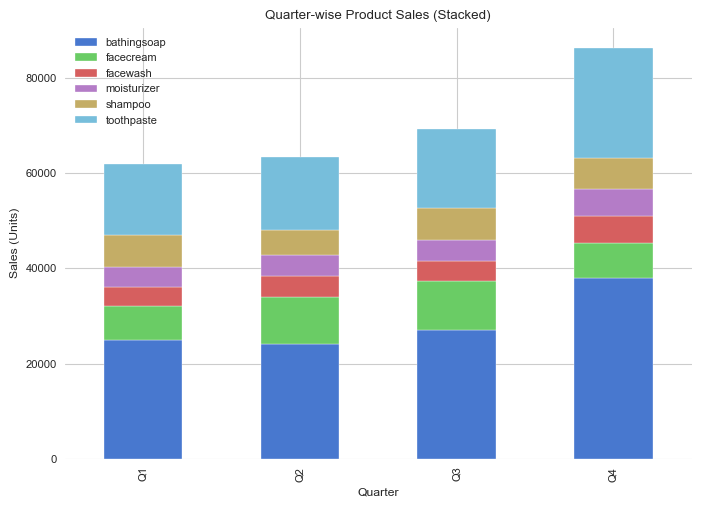

In [71]:
quarter_sales = df.pivot_table(index='Quarter', values=products, aggfunc='sum')

# Create stacked bar chart
quarter_sales.plot(kind='bar', stacked=True)
plt.title("Quarter-wise Product Sales (Stacked)")
plt.xlabel("Quarter")
plt.ylabel("Sales (Units)")
plt.legend()
sns.despine()
plt.show()